In [ ]:
#Todo esto lo hizo el mismísimo Ivan Rojas de nuestro equipo
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv('bienesraices.csv', sep=';')
df.head()

,edad,distancia,tiendas,latitud,longitud,precio
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


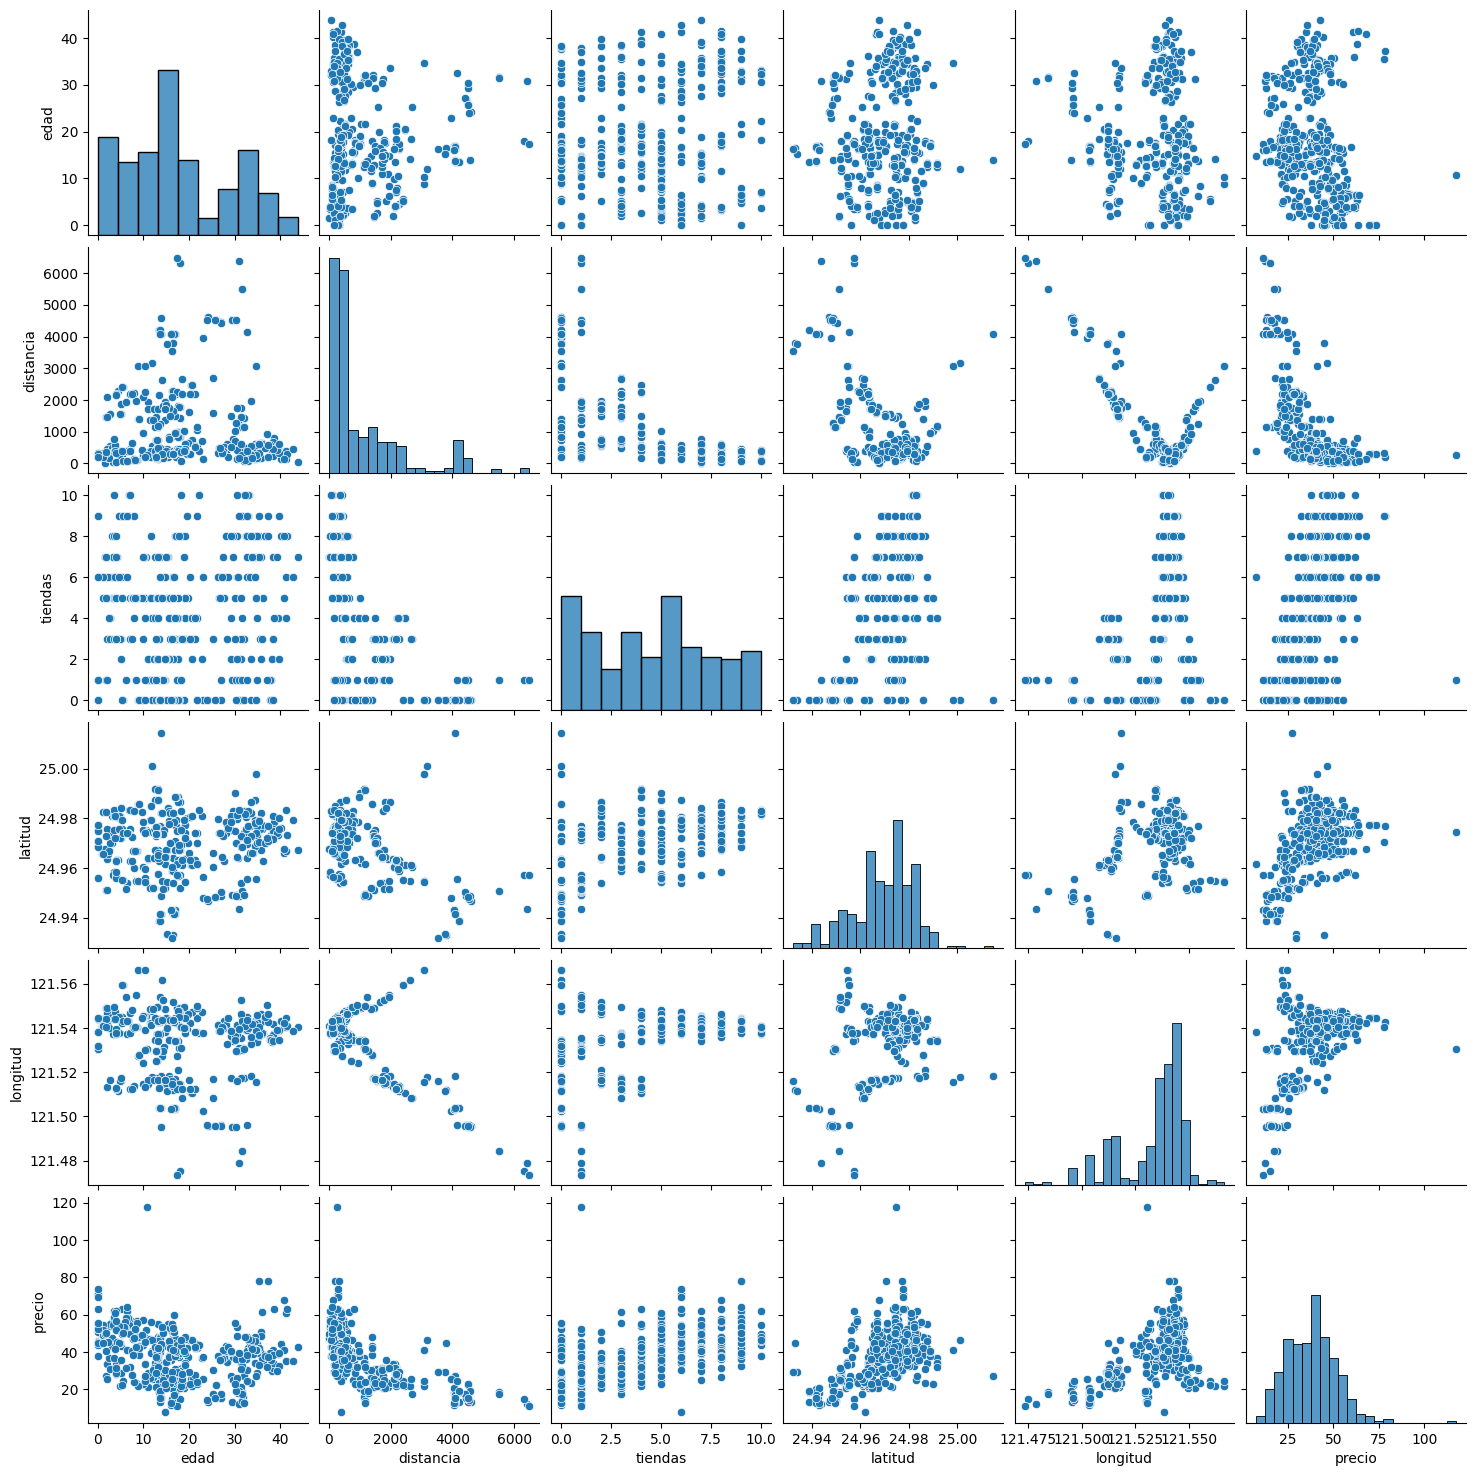

In [ ]:
sns.pairplot(df)

<AxesSubplot:>

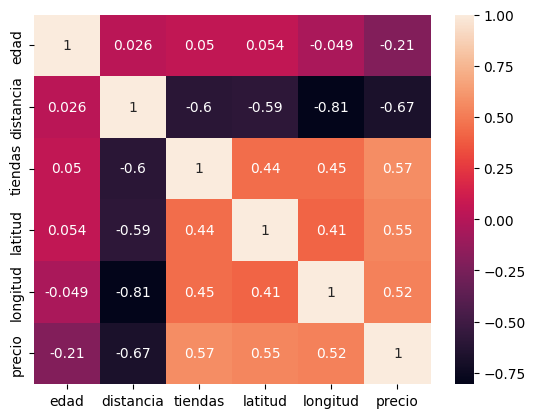

In [ ]:
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='precio', ylabel='Density'>

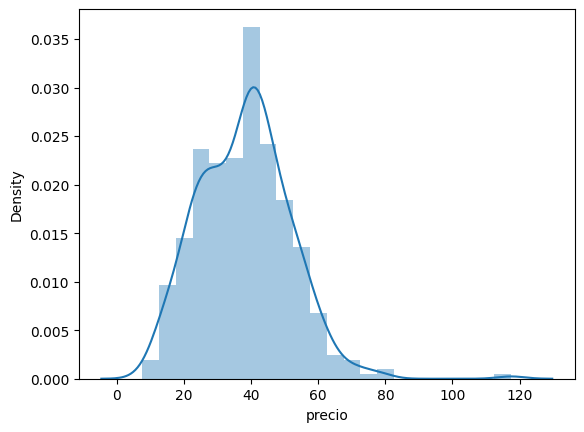

In [ ]:
sns.distplot(df['precio'])

In [ ]:
df[df['precio']<30]

,edad,distancia,tiendas,latitud,longitud,precio
8,31.7,5512.0380,1,24.95095,121.48458,18.8
9,17.9,1783.1800,3,24.96731,121.51486,22.1
13,20.4,2469.6450,4,24.96108,121.51046,23.8
20,4.5,2275.8770,3,24.96314,121.51151,29.3
22,14.7,1360.1390,1,24.95204,121.54842,24.6
...,...,...,...,...,...,...
401,7.6,2175.0300,3,24.96305,121.51254,27.7
402,12.7,187.4823,1,24.97388,121.52981,28.5
407,5.2,2408.9930,0,24.95505,121.55964,22.3
408,18.5,2175.7440,3,24.96330,121.51243,28.1


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precio'>

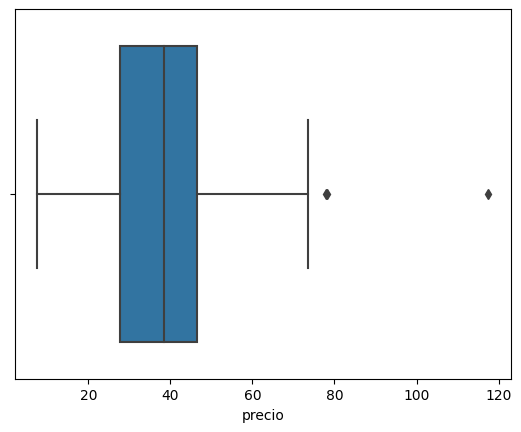

In [ ]:
sns.boxplot(df['precio'])

In [ ]:
df['precio'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: precio, dtype: float64

In [ ]:
#Buscando outliers de precio
#El chico de 117.5 se ve bastante outlieroso, lo mandamos alv?
df[df['precio']>70]

,edad,distancia,tiendas,latitud,longitud,precio
16,0.0,292.9978,6,24.97744,121.54458,70.1
105,0.0,292.9978,6,24.97744,121.54458,71.0
166,0.0,292.9978,6,24.97744,121.54458,73.6
220,37.2,186.5101,9,24.97703,121.54265,78.3
270,10.8,252.5822,1,24.97460,121.53046,117.5
312,35.4,318.5292,9,24.97071,121.54069,78.0


In [ ]:
df = df[df['precio']<80]
df.head()

,edad,distancia,tiendas,latitud,longitud,precio
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precio'>

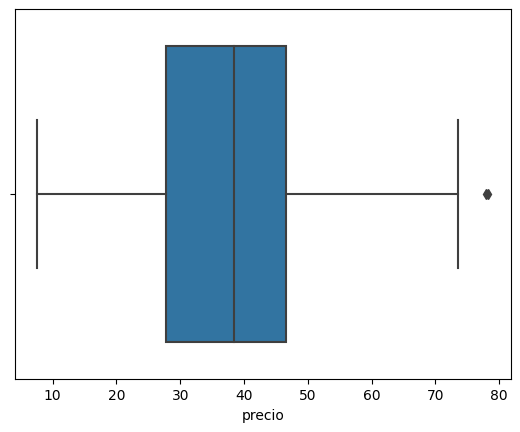

In [ ]:
sns.boxplot(df['precio'])

In [ ]:
#No hay nulos alv
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 413
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       413 non-null    float64
 1   distancia  413 non-null    float64
 2   tiendas    413 non-null    int64  
 3   latitud    413 non-null    float64
 4   longitud   413 non-null    float64
 5   precio     413 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 22.6 KB


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='edad', ylabel='Density'>

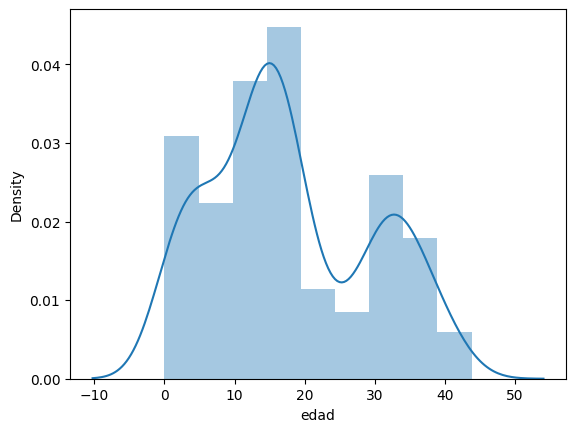

In [ ]:
sns.distplot(df['edad'])

In [ ]:
df.columns

Index(['edad', 'distancia', 'tiendas', 'latitud', 'longitud', 'precio'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['precio'], axis=1)
y = df['precio']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'''
METRIC REPORT
====================================
MAE:{mean_absolute_error(y_test,y_pred)}
RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}
MSE:{mean_squared_error(y_test,y_pred)}
R2:{r2_score(y_test,y_pred)}

''')


METRIC REPORT
MAE:6.19083006071516
RMSE:8.847441363767643
MSE:78.27721868530666
R2:0.568332427011283




In [ ]:
#Ahora hacemos lo mismo, pero sin considerar la edad de la casa:

X = df.drop(['precio','edad'], axis=1)
y = df['precio']

X


,distancia,tiendas,latitud,longitud
0,84.87882,10,24.98298,121.54024
1,306.59470,9,24.98034,121.53951
2,561.98450,5,24.98746,121.54391
3,561.98450,5,24.98746,121.54391
4,390.56840,5,24.97937,121.54245
...,...,...,...,...
409,4082.01500,0,24.94155,121.50381
410,90.45606,9,24.97433,121.54310
411,390.96960,7,24.97923,121.53986
412,104.81010,5,24.96674,121.54067


In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'''
METRIC REPORT
====================================
MAE:{mean_absolute_error(y_test,y_pred)}
RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}
MSE:{mean_squared_error(y_test,y_pred)}
R2:{r2_score(y_test,y_pred)}

''')


METRIC REPORT
MAE:6.300766640956939
RMSE:8.074208491189312
MSE:65.1928427591936
R2:0.6157890030043158




In [ ]:
model.coef_

array([-5.20348984,  3.64436028,  2.13387261,  0.30855726])